# Example: Finding fault scarps

This uses the Scarp template to detect scarp-like landforms and estimate their height and relative age.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import scarplet as sl
from scarplet.WindowedTemplate import Scarp

The test data comes from the Carrizo Plain section of the San Andreas Fault. It covers part of the Wallace Creek site, a set of offset channels and related scarps and gulleys that have been studied in detail by earthquake geologists and geophysicists. This high resolution  lidar dataset (0.5 m) was downloaded from [OpenTopography](http://opentopography.org), a data facility for high-resolution topographic data.

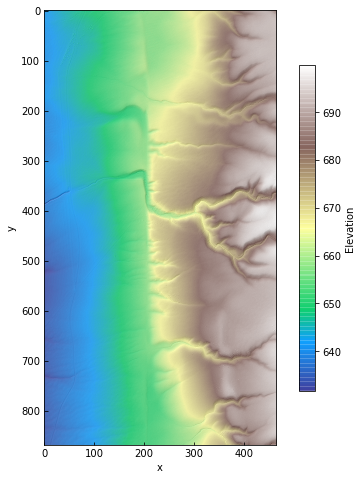

In [3]:
data = sl.load('data/faultzone.tif')
data.plot(color=True, figsize=(8,8))

In [4]:
# Look for scarps of a single morphologic age
params = {'scale': 100,
          'age': 100.,
          'ang_min': -10 * np.pi / 2,
          'ang_max': 10 * np.pi / 2
         }

res = sl.match(data, Scarp, **params)

In [5]:
amp, age, angle, snr = res

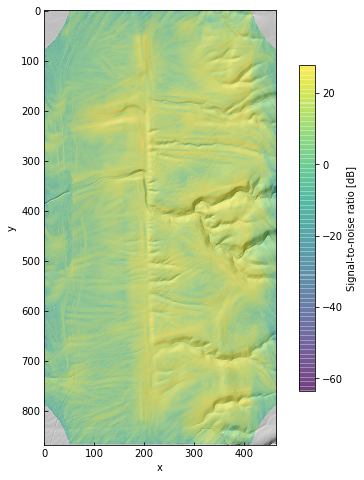

In [6]:
data.plot(color=False, figsize=(8, 8))
ax = plt.gca()
im = ax.imshow(10 * np.log10(snr), alpha=0.5, cmap='viridis')
cb = plt.colorbar(im, ax=ax, shrink=0.75, label='Signal-to-noise ratio [dB]')

In fact, the sign of the template amplitude is determined by the aspect of the scarp. We will mask by SNR and discard the sign of the amplitude -- we just want to see how tall the scarps might be.

In [7]:
mask = snr < 100
amp[mask] = np.nan
amp = np.abs(amp)

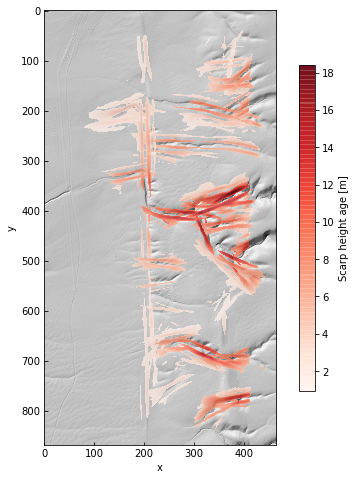

In [8]:
data.plot(color=False, figsize=(8, 8))
ax = plt.gca()
im = ax.imshow(amp, alpha=0.75, cmap='Reds')
cb = plt.colorbar(im, ax=ax, shrink=0.75, label='Scarp height age [m]')

From the amplitude field, we can see that there are some false positives -- the channels on the right of the image -- as well as amplitude gradients along the main fault trace.

That was for just one relative age, 10 m<sup>2</sup>. If we don't provide an `age` parameter it will search over a large range of ages from 0 to 3000 m<sup>2</sup>.

In [ ]:
# Search over all ages in default range
res = sl.match(data, Scarp, scale=100.)

Again, we'll do some masking to discard false positives and low-SNR features

In [ ]:
angle, snr = [res[2], res[3]]
mask = snr < 100

res[:, mask] = np.nan
ns = np.abs(angle) >= 5 * np.pi / 180.
res[:, mask] = np.nan

amp, age, angle, snr = res
amp = np.abs(amp)

In [ ]:
data.plot(color=False, figsize=(8, 8))
ax = plt.gca()
im = ax.imshow(10 * np.log10(res[3]), alpha=0.75, cmap='viridis')
cb = plt.colorbar(im, ax=ax, shrink=0.75, label='Signal-to-noise ratio [dB]')

In [ ]:
data.plot(color=False, figsize=(8, 8))
ax = plt.gca()
im = ax.imshow(amp, alpha=0.75, cmap='Reds')
cb = plt.colorbar(im, ax=ax, shrink=0.75, label='Scarp height [m]')

In [ ]:
data.plot(color=False, figsize=(8, 8))
ax = plt.gca()
im = ax.imshow(age, alpha=0.75, cmap='viridis')
cb = plt.colorbar(im, ax=ax, shrink=0.75, label='Relative age [m$^2$]')

The parameter grids are just Numpy arrays. This gives us the option of looing at along-strike variations in age.

In [ ]:
best_idx = [np.where(x == np.nanmax(x))[0][0] or 0 for x in snr]

best_amps = [row[idx] for row, idx in zip(amp, best_idx)]
amp5 = [np.nanpercentile(row, 5) for row in amp]
amp95 = [np.nanpercentile(row, 95) for row in amp]

best_ages = [row[idx] for row, idx in zip(age, best_idx)]
age5 = [np.nanpercentile(row, 5) for row in age]
age95 = [np.nanpercentile(row, 95) for row in age]

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
x = np.arange(amp.shape[0])

ax[0].fill_between(x, y1=amp5, y2=amp95, color='k', alpha=0.1)
ax[0].plot(x, best_amps, 'rs')
ax[0].plot(x, amp5, 'k--')
ax[0].plot(x, amp95, 'k--')
ax[0].set_ylabel('Amplitude [m]', fontsize=14)

ax[1].fill_between(x, y1=age5, y2=age95, color='k', alpha=0.1)
ax[1].plot(x, best_ages, 'b^')
ax[1].plot(x, age5, 'k--')
ax[1].plot(x, age95, 'k--')
ax[1].set_xlabel('Along-strike distance', fontsize=14)
ax[1].set_ylabel('Relative age [m$^2$]', fontsize=14)